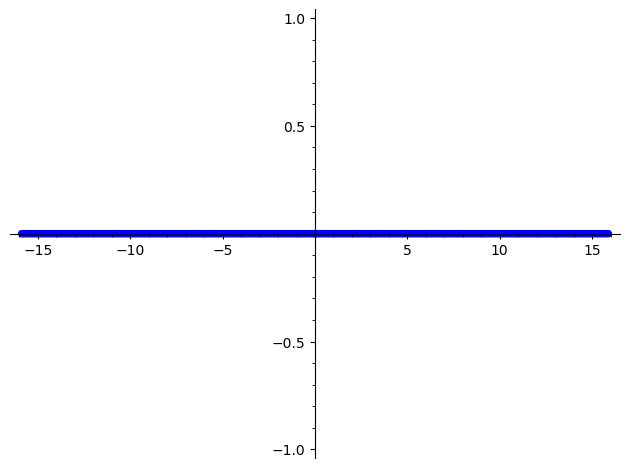

In [ ]:
# Generate values for fixed-point representation
values = []

for sign in [-1, 1]:
    for i in range(2^4):
        for f in range(2^3):
            x = sign * (i + f/2^3)
            values.append(x)

list_plot([(x, 0) for x in values], plotjoined=False, size=30)


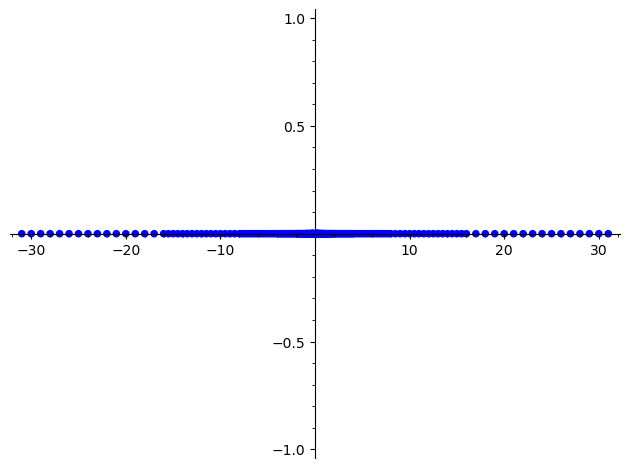

In [ ]:
# Generate values for floating-point representation
values = []

bias = 3

for sign in [-1, 1]:
    for m in range(2^4):          # Mantisse (4 Bit)
        for E in range(2^3):      # Exponent (3 Bit)
            mantissa = 1 + m/2^4
            exponent = E - bias
            x = sign * mantissa * 2^exponent
            values.append(x)

list_plot([(x, 0) for x in values], plotjoined=False, size=30)



In [ ]:
# Base conversion function

def convert_number(z, b1, b2, alphabet1=None, alphabet2=None):
    if alphabet1 is None:
        alphabet1 = "0123456789ABCDEFGHJKMNPQRSTVWXYZ"
    if alphabet2 is None:
        alphabet2 = "0123456789ABCDEFGHJKMNPQRSTVWXYZ"
    
    z_str = str(z)  # Convert input to string for iteration
    
    # Convert input number to decimal
    decimal = 0
    for i in range(len(z_str)):
        exp = len(z_str) - i - 1
        digit = alphabet1.index(z_str[i])
        decimal += digit * (b1 ** exp)
    
    # Convert decimal to target base
    return decimal_to_base(decimal, b2, alphabet2)


# Helper function: decimal to arbitrary base
def decimal_to_base(d, b, alphabet):
    num = []
    while d > 0:
        remainder = alphabet[d % b]
        num.append(remainder)
        d = d // b
    return ''.join(num[::-1])


# Tests
test1 = convert_number(100110, 2, 10)
test2 = convert_number(100110, 10, 16)
test3 = convert_number(100110, 16, 2)
test4 = convert_number(100110, 8, 10)

print([x for x in [test1, test2, test3, test4]])


['38', '1870E', '100000000000100010000', '32840']
